<a href="https://colab.research.google.com/github/AnuragGorkar/Feed_Forward_Neural_Network_Class/blob/master/Feed_Forward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs  

# SIGMOID NEURON CLASS

In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    return np.dot(x, self.w.T)+ self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)* y_pred * (1- y_pred)* x 

  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)* y_pred * (1- y_pred)

  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0 :
      return y_pred * x
    elif y == 1 :
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("Y SHOULD ONLY BE 1 OR 0")
  
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0 :
      return y_pred 
    elif y == 1 :
      return -1 * (1 - y_pred) 
    else:
      raise ValueError("Y SHOULD ONLY BE 1 OR 0")

  def fit(self, X, Y, epochs = 1, learning_rate = 0.1, initialise = True, loss_fn = "mse", display_loss = False):
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    if display_loss:
      loss = {}
    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw = 0
      db = 0
      for x, y in zip(X,Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x,y)
          db += self.grad_b_mse(x,y)
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x,y)
          db += self.grad_b_ce(x,y)

      m = X.shape[1]
      
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m

      if display_loss:
        y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, y_pred)

    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel("Mean Squared Error")
      if loss_fn == "ce":
        plt.ylabel("Log Loss")
      plt.show()
    
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred) 

   

  
  

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# GENERATE DATA


In [0]:
data,labels = make_blobs(n_samples= 1000, centers = 4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


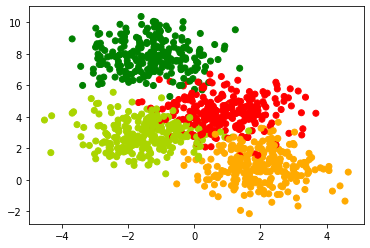

In [0]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

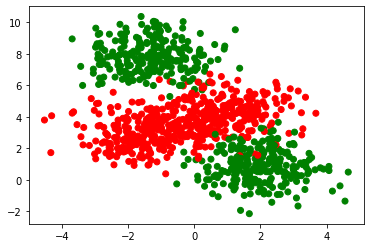

In [0]:
labels_orig = labels
labels = np.mod(labels_orig,2)
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data , labels, stratify = labels, random_state = 0)
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


# TRAIN MEAN SQUARE ERROR MODEL

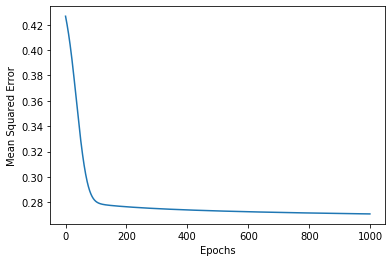

In [0]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs = 1000, learning_rate = 0.001, display_loss = True)

In [0]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = sn.predict(X_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel() 
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_test)

print("Train Acccuracy: ", round(accuracy_train, 2))
print("Test Acccuracy: ", round(accuracy_test, 2))

Train Acccuracy:  0.73
Test Acccuracy:  0.72


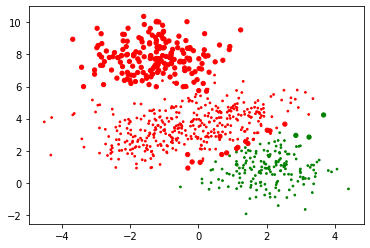

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap = my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))

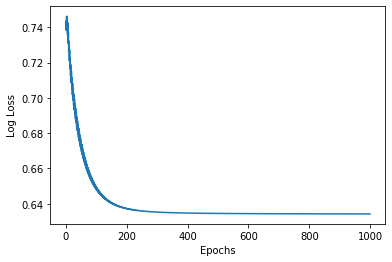

In [0]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs = 1000, learning_rate = 0.001, display_loss = True, loss_fn = "ce")

In [0]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = sn.predict(X_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel() 
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_test)

print("Train Acccuracy: ", round(accuracy_train, 2))
print("Test Acccuracy: ", round(accuracy_test, 2))

Train Acccuracy:  0.65
Test Acccuracy:  0.58


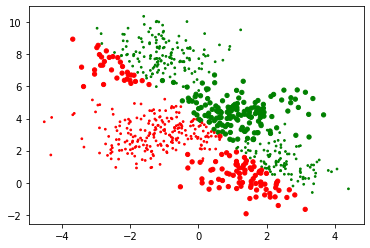

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap = my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))

# GENERIC FEED FORWARD NEURAL NETWORK CLASS 


In [0]:
class FFSNNetwork:

  def __init__(self, n_inputs, hidden_layer_sizes=[2]):
    self.nx = n_inputs # Number of input parameters
    self.ny = 1 # Number of output classes
    self.nh = len(hidden_layer_sizes) #Total number of hidden layers
    self.sizes = [self.nx]+hidden_layer_sizes+[self.ny] # Total number of layers 
    self.W = {} # Weights dict
    self.B = {} # Bias dict

    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1,self.sizes[i+1]))

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0]= x.reshape(1,-1)
    for i in range(self.nh+ 1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+ 1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]

  def grad_sigmoid(self, x):
    return x*(1-x)

  def grad(self,x,y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dA = {}
    self.dH = {}
    self.dA[self.nh+1] = (self.H[self.nh+1] - y)
    for k in range(self.nh+1,0,-1):
      self.dW = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(x))

  def fit(self, X, Y, epochs=1, learning_rate = 1, initialise = True, display_loss = True):
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1,self.sizes[i+1]))
    if display_loss:
      loss = {}
    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1,self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]

      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m

      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = mean_squared_error(Y_pred , Y)

    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel("Mean Squared Error")
      plt.show()
    
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [0]:
ffsnn = FFSNNetwork(2, [2, 3])
ffsnn.fit(X_train, Y_train, epochs = 1000, learning_rate = 0.001, display_loss = True)

ValueError: ignored